In [2]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

In [3]:
#load the dataset
data = load_boston()

In [4]:
# Create a target column with the dataset target
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# check the data (exploratory analysis)
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#investigate data.
#sns.FacetGrid(data, col=df.target, row=df.CRIM)
#plt.show()

In [15]:
df["ZN"].replace(0, np.nan, inplace=True)
df["CHAS"].replace(0, np.nan, inplace=True)
df.isnull().sum()

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
target       0
dtype: int64

In [16]:
df = df.drop(["ZN", "CHAS"], axis=1) 
df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


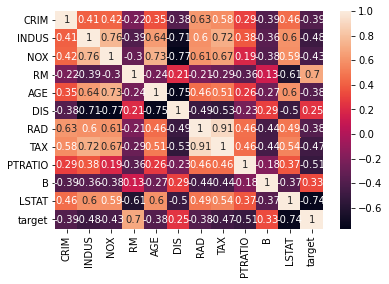

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True);

In [22]:
## split data into train and test
X = df.drop(["target"], axis=1)
#y = df["target"]
y = np.ravel(df["target"])
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("The length of X_train is now:", len(X_train), "which matches y_train:", len(y_train))
print("While the length of X_test is:", len(X_test), "which matches y_test:", len(y_test))

(404, 11) (404,) (102, 11) (102,)
The length of X_train is now: 404 which matches y_train: 102
While the length of X_test is: 404 which matches y_test: 102


In [24]:
## Pick one model to use, such as Linear Regression -seen in class-.
#model = LinearRegression()
#model.fit(X_train, y_train)
#score = model.score(X_train, y_train)

In [ ]:
## test the accuracy and print the score with one model